In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
data = pd.read_csv('complete_dataset_cleaned.csv')
data.pop('Pkey')
data.pop('date')

0        2020-07-17
1        2020-07-18
2        2020-07-20
3        2020-07-21
4        2020-07-22
            ...    
28366    2022-10-07
28367    2022-10-08
28368    2022-10-09
28369    2022-10-10
28370    2022-10-11
Name: date, Length: 28371, dtype: object

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
data.iloc[1,:]

continent                            Africa
location                            Algeria
new_cases_per_million                13.604
new_deaths_per_million                0.249
reproduction_rate                      1.18
total_vaccinations_per_hundred          0.0
stringency_index                      74.07
population_density                   17.348
gdp_percentage_weekly                   NaN
gdp_per_capita                    13913.839
cardiovasc_death_rate               278.364
diabetes_prevalence                    6.73
female_smokers                          0.7
male_smokers                           30.4
hospital_beds_per_thousand              1.9
life_expectancy                       76.88
human_development_index               0.748
icu_patients_per_million              1.517
Unnamed: 20                             NaN
severity                          54.634538
Name: 1, dtype: object

In [ ]:
data=data.iloc[:,:-2]
data=data.iloc[:,2:]
data.head()

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_percentage_weekly,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,icu_patients_per_million
0,13.423,0.113,1.20,0.0,74.07,17.348,NaN,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.748,1.403
1,13.604,0.249,1.18,0.0,74.07,17.348,NaN,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.748,1.517
2,13.740,0.204,1.15,0.0,74.07,17.348,NaN,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.748,1.449
3,13.287,0.294,1.14,0.0,74.07,17.348,NaN,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.748,1.268
4,13.446,0.249,1.13,0.0,74.07,17.348,NaN,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.748,1.154


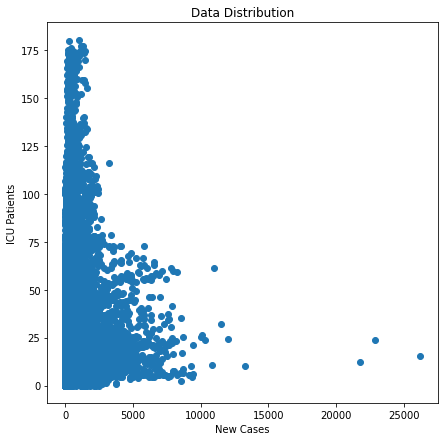

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data["new_cases_per_million"],data["icu_patients_per_million"])
plt.xlabel('New Cases')
plt.ylabel('ICU Patients')
plt.title('Data Distribution')
plt.show()

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
data=clean_dataset(data)

In [ ]:
#training k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data.loc[:,['new_cases_per_million','icu_patients_per_million']])

#predictions from kmeans
pred = kmeans.predict(data.loc[:,['new_cases_per_million','icu_patients_per_million']])
frame = pd.DataFrame(data.loc[:,['new_cases_per_million','icu_patients_per_million']])

In [ ]:
len(pred)

15396

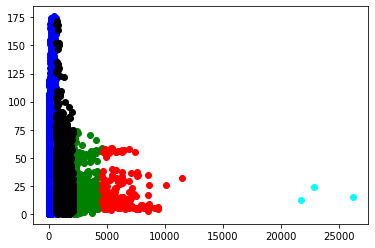

In [ ]:
frame['cluster'] = pred
frame.columns = ['new_cases_per_million', 'icu_patients_per_million', 'cluster']

#plotting results
color=['blue','green','cyan', 'black','red']
for k in range(0,5):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["new_cases_per_million"],data["icu_patients_per_million"],c=color[k])
plt.show()

In [ ]:
data = pd.read_csv('complete_dataset_cleaned.csv')
data.pop('Pkey')
data.pop('date')
data=data.iloc[:,:-2]
data=data.iloc[:,2:]
data=clean_dataset(data)

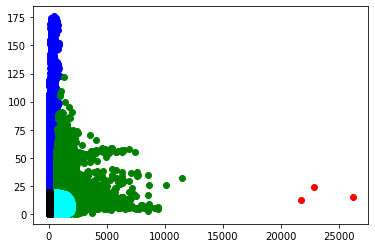

In [ ]:

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
gmm.fit(data.loc[:,['new_cases_per_million','icu_patients_per_million']])

#predictions from gmm
labels = gmm.predict(data.loc[:,['new_cases_per_million','icu_patients_per_million']])
frame = pd.DataFrame(data.loc[:,['new_cases_per_million','icu_patients_per_million']])
frame['cluster'] = labels
frame.columns = ['new_cases_per_million', 'icu_patients_per_million', 'cluster']

color=['blue','green','cyan', 'black','red']
for k in range(0,5):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["new_cases_per_million"],data["icu_patients_per_million"],c=color[k])
plt.show()

In [ ]:
labels[1]

3